# Investigation of Water Tunnels leading to Manganese-Cluster in Photosystem II

## Calculation, profiling and visualisation of the tunnels

### The calculation of the tunnels were made using Caver 3.0 (https://caver.cz/)

In [38]:
import pandas as pd

### The algorithm used provides the analysis of the tunnel characteristics. Analysis parameters must be carefully investigated to determine goodness of the calculation.

In [2]:
tun_char = pd.read_csv('./analysis/tunnel_characteristics.csv')

In [39]:
tun_char.head()

,Snapshot,Tunnel cluster,Tunnel,Throughput,Cost,Bottleneck radius,Bottleneck R error bound,Length,Curvature
0,7N8O.pdb,1,1,0.310657,1.169067,1.095425,-,37.528636,1.631948
1,7N8O.pdb,2,2,0.309609,1.172445,1.095425,-,35.746781,1.964500
2,7N8O.pdb,3,3,0.287397,1.246892,0.972942,-,38.803676,1.436391
3,7N8O.pdb,4,4,0.275755,1.288244,1.028281,-,38.782050,1.447190
4,7N8O.pdb,5,5,0.260571,1.344881,1.095425,-,42.159341,1.843151


In [40]:
tun_char.keys()

Index(['Snapshot', ' Tunnel cluster', ' Tunnel', ' Throughput', ' Cost',
       ' Bottleneck radius', ' Bottleneck R error bound', ' Length',
       ' Curvature'],
      dtype='object')

### Tunnel lengths and bottleneck radius are the two most important parameters providing insights for the water permeation from the protein surface into to the active center.

<AxesSubplot:xlabel=' Tunnel'>

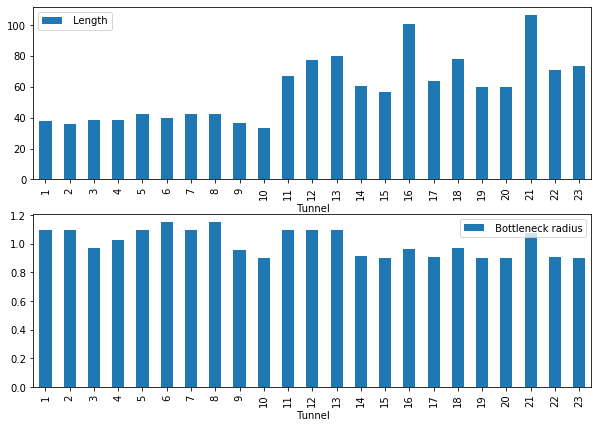

In [42]:
fig, ax = plt.subplots(nrows=2, ncols=1)
tun_char.plot(x=' Tunnel', y=' Length', ax = ax[0], kind= 'bar', figsize=(10,7))
tun_char.plot(x=' Tunnel', y=' Bottleneck radius', ax = ax[1], kind= 'bar',figsize=(10,7))

### Curvature vs. Length shows the complexity of the water channel systems. Whereas a linear relationship betweeb cost and length is necessary to investigate possible flaws of the algorithm. More investigation is needed to define a relationship between this parameters and the goodnes of the calculation.

<AxesSubplot:xlabel=' Length'>

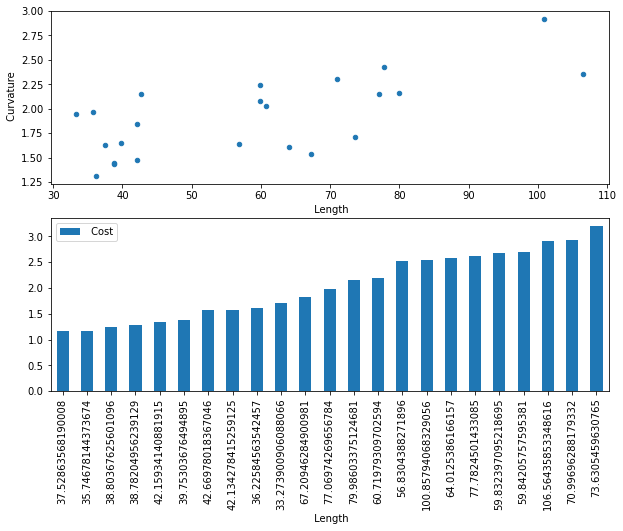

In [45]:
fig, ax = plt.subplots(nrows=2, ncols=1)
tun_char.plot(x=' Length', y=' Curvature', ax = ax[0], kind= 'scatter', figsize=(10,7))
tun_char.plot(x=' Length', y=' Cost', ax = ax[1], kind= 'bar',figsize=(10,7))

### Bottlenecks are the narrowest region on the water propagation pathway. The residues around these regions are of particular interest in site-specific mutation studies. By mutation of these residues, water access can be increased or decreased which may have an effect in the efficiency of the active center.

In [43]:
bneck = pd.read_csv('./analysis/bottlenecks_edit.csv')
#bneck.head()
bneck.keys()

Index(['Snapshot', 'Tunnel cluster', 'Tunnel', 'Throughput', 'Cost',
       'Bottleneck X', 'Bottleneck Y', 'Bottleneck Z', 'Bottleneck R',
       'Bottleneck residues'],
      dtype='object')

In [8]:
bneck.dtypes

Snapshot                object
Tunnel cluster           int64
Tunnel                   int64
Throughput             float64
Cost                   float64
Bottleneck X           float64
Bottleneck Y           float64
Bottleneck Z           float64
Bottleneck R           float64
Bottleneck residues     object
dtype: object

In [9]:
bneck.head()

,Snapshot,Tunnel cluster,Tunnel,Throughput,Cost,Bottleneck X,Bottleneck Y,Bottleneck Z,Bottleneck R,Bottleneck residues
0,7N8O.pdb,1,1,0.310657,1.169067,113.602315,164.902152,141.727890,1.095425,"A:165,A:344,C:344,A:170,A:343,A:166,A:164,C:34..."
1,7N8O.pdb,2,2,0.309609,1.172445,113.602315,164.902152,141.727890,1.095425,"A:165,A:344,C:344,A:170,A:343,A:166,A:164,C:34..."
2,7N8O.pdb,3,3,0.287397,1.246892,118.804842,176.405511,136.663767,0.972942,"C:399,A:329,V:159,A:188,A:326,A:325,C:397,A:33..."
3,7N8O.pdb,4,4,0.275755,1.288244,119.105757,161.494591,124.180152,1.028281,"A:338,C:326,C:320,C:321,C:319,C:324,C:325,D:350"
4,7N8O.pdb,5,5,0.260571,1.344881,113.602315,164.902152,141.727890,1.095425,"A:165,A:344,C:344,A:170,A:343,A:166,A:164,C:34..."


### The syntax should be fixed to be used in nglview.

In [13]:
bneck['Bottleneck residues'][0]

'A:165,A:344,C:344,A:170,A:343,A:166,A:164,C:345,A:296'

In [52]:
bneck['Bottleneck residues_fixed'] = bneck['Bottleneck residues'].str.split(',') 
bneck.head()

,Snapshot,Tunnel cluster,Tunnel,Throughput,Cost,Bottleneck X,Bottleneck Y,Bottleneck Z,Bottleneck R,Bottleneck residues,Bottleneck residues_fixed
0,7N8O.pdb,1,1,0.310657,1.169067,113.602315,164.902152,141.727890,1.095425,"A:165,A:344,C:344,A:170,A:343,A:166,A:164,C:34...","[A:165, A:344, C:344, A:170, A:343, A:166, A:1..."
1,7N8O.pdb,2,2,0.309609,1.172445,113.602315,164.902152,141.727890,1.095425,"A:165,A:344,C:344,A:170,A:343,A:166,A:164,C:34...","[A:165, A:344, C:344, A:170, A:343, A:166, A:1..."
2,7N8O.pdb,3,3,0.287397,1.246892,118.804842,176.405511,136.663767,0.972942,"C:399,A:329,V:159,A:188,A:326,A:325,C:397,A:33...","[C:399, A:329, V:159, A:188, A:326, A:325, C:3..."
3,7N8O.pdb,4,4,0.275755,1.288244,119.105757,161.494591,124.180152,1.028281,"A:338,C:326,C:320,C:321,C:319,C:324,C:325,D:350","[A:338, C:326, C:320, C:321, C:319, C:324, C:3..."
4,7N8O.pdb,5,5,0.260571,1.344881,113.602315,164.902152,141.727890,1.095425,"A:165,A:344,C:344,A:170,A:343,A:166,A:164,C:34...","[A:165, A:344, C:344, A:170, A:343, A:166, A:1..."


In [69]:
def fixsyntax(word):
    str = word.split(':')
    str.reverse()
    fixed = ':'.join(str)
    return fixed

In [74]:
tun1_bneck_res = [fixsyntax(word) for word in bneck['Bottleneck residues_fixed'][0]]
tun1_bneck_res

['165:A',
 '344:A',
 '344:C',
 '170:A',
 '343:A',
 '166:A',
 '164:A',
 '345:C',
 '296:A']

### An example visualisation of tunnel 1 and its bottleneck residues

In [16]:
import nglview as nv

### Loading the pdb file for tunnel one and the Photosystem II crystal structure.

In [17]:
with open("./data/clusters_timeless/tun_cl_001_1.pdb") as f:
    tun1 = nv.show_file(f, ext="pdb", gui=True)
tun1.add_component(nv.PdbIdStructure("7N8O"))

In [18]:
tun1.n_components

0

### Preparing the viewer for visualisation of the tunnel. 

In [19]:
tun1[0].center()

In [58]:
tun1[1].clear()
tun1[1].add_cartoon()
tun1.update_representation(component=1, repr_index=0, opacity=0.1)

In [78]:
tun1[1].add_representation('licorice', selection='401:A')
for res in tun1_bneck_res:
    tun1[1].add_representation('licorice', selection= res)

### Adding sphere to the location where the bottleneck resides. 

In [83]:
tun1.shape.add_sphere([113.602315, 164.902152, 141.727890],[0,0,1], 1.095425)

In [27]:
tun1[0].center()

In [23]:
tun1

NGLWidget()

### It is possible to write user defined functions to work with the visualisation. In this case the source code should be given as js. A detailed manual can be found here: https://nglviewer.org/ngl/api/manual/index.html

### An example code to show residues around a specific ligand in a defined radius.

In [35]:
def residues_around(view, component_index, selection, radius):
    js = (
        f"""
        // Select the effected component in the view
        var system = this.stage.compList[{component_index}];
        // Store the selection
        var prevSele = system.selection.string;
        // Find the selected ligan
        system.setSelection("{selection}");
        // Select atoms in desired radius within the selection
        var around = system.structure.getAtomSetWithinSelection(system.selection, {radius});
        """
        """
        // Extend the selection to residues including selected atoms
        var around_complete = system.structure.getAtomSetWithinGroup(around);
        // Add the representation as licorice (this can be changed) !Opacity doesn't work for licorice
        system.addRepresentation("licorice", {sele: around_complete.toSeleString(), opacity=0.1});
        // Store the selection
        system.setSelection(prevSele)
        """
    )
    view._execute_js_code(js)

In [36]:
residues_around(tun1,component_index = 1, selection='401:A', radius = 20)